## Final Phase 4 Project Submission

Please fill out: 
* Student name: **Alberto SYLVEUS** 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: **Wedter JEROME and Geovany Baptista Polo LAGUERRE**
*  
[Click here to get the github repository](https://github.com/tolly00/phase-4-project.git)

# Overview

When we build a batiment, we have someting that very important. To be carefull about this thing, we are going to make a predictive model that estimates the heating load and the cooling load of a building based on its physical and structural features.

# Business Understanding

The energy of a building is as really important as others parts of a building construction. For that we are going to make an accurate load predictions can support energy-efficient building design, reduce energy costs, and help meet sustainability standards.

# Data Understanding

We use the **Energy Efficiency Dataset** (commonly available on the UCI Machine Learning Repository), which contains **768 building samples** with the following input features:

-   **Relative Compactness(X1)**: A ratio that measures how compact a building’s shape is.
    
-   **Surface Area(X2)**: The total external area of the building’s envelope (walls, roof, etc.).
    
-   **Wall Area(X3)**: The total area of all external walls of the building.
    
-   **Roof Area(X4)**: The horizontal external surface area of the building’s roof.
    
-   **Overall Height(X5)**: The vertical height of the building.
    
-   **Orientation(X6)**: The building’s facing direction (North, South, East, West).
    
-   **Glazing Area(X7)**: The proportion of the building’s exterior covered by windows (glass).
    
-   **Glazing Area Distribution(X8)**: Definition: How the glazing (windows) is distributed across building facades (all on one side, evenly distributed, etc.).
    

**Targets (Outputs):**

-   Heating Load(Y1) (kWh/m²): The amount of energy needed to maintain comfortable indoor temperature in cold conditions.
    
-   Cooling Load(Y2) (kWh/m²): The amount of energy needed to keep indoor temperature comfortable in hot conditions.

## importing module and package

In [70]:
# data manipulation
import pandas as pd
import numpy as np

# vizualisation
import seaborn as sns
import matplotlib.pyplot as plt

# prepocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score, roc_curve

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [2]:
# load the dataset
df = pd.read_excel('data/ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
df.isna().sum() # check on null value

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [6]:
# check on numeric and categorical
df.nunique()

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    587
Y2    636
dtype: int64

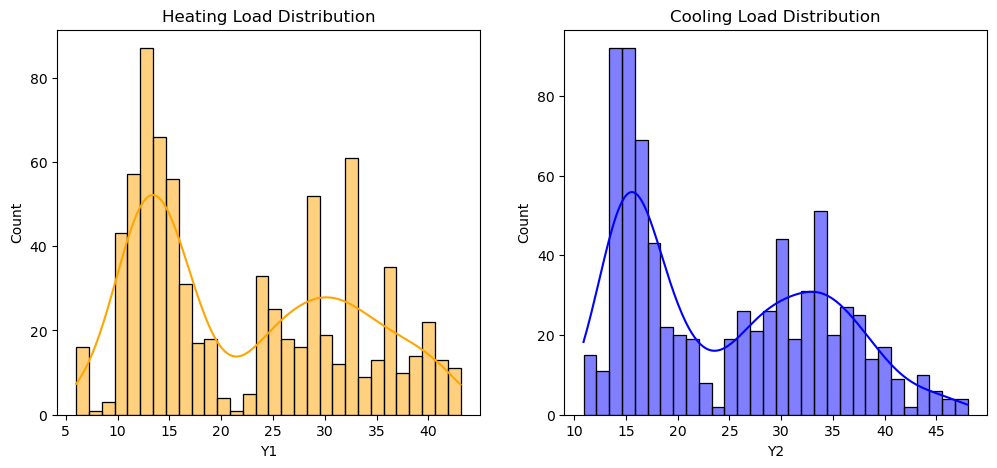

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df["Y1"], bins=30, kde=True, ax=axes[0], color="orange")
axes[0].set_title("Heating Load Distribution")

sns.histplot(df["Y2"], bins=30, kde=True, ax=axes[1], color="blue")
axes[1].set_title("Cooling Load Distribution")

plt.show()

In [8]:
FEATURES = ["X1","X2","X3", "X4", "X5", "X6", "X7","X8"]

TARGETS = ["Y1", "Y2"]

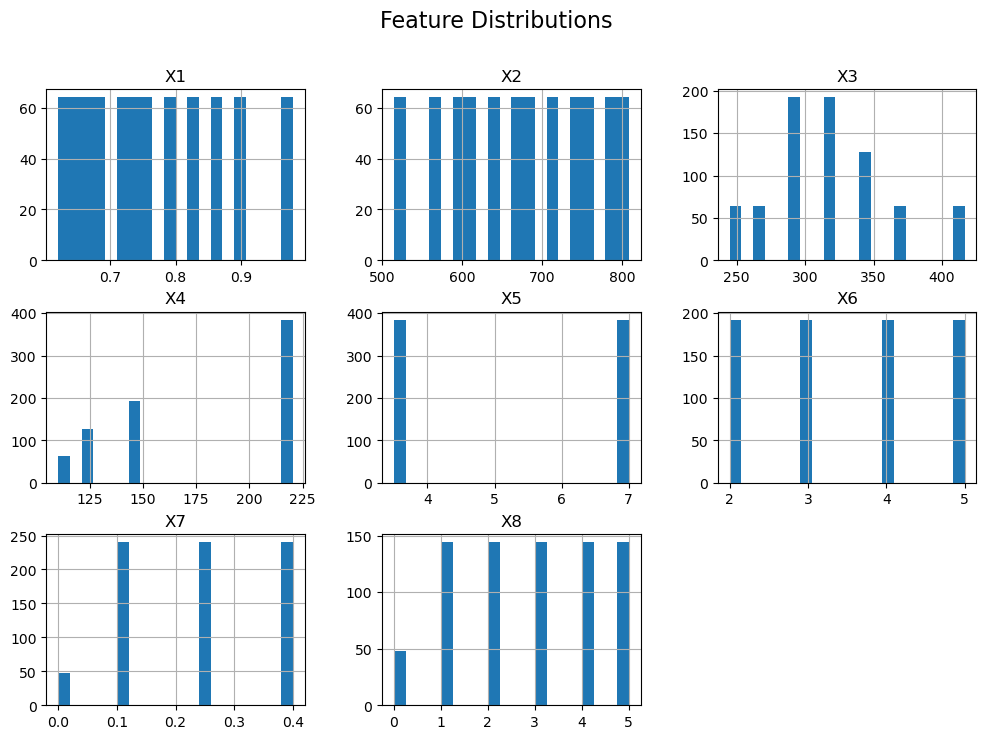

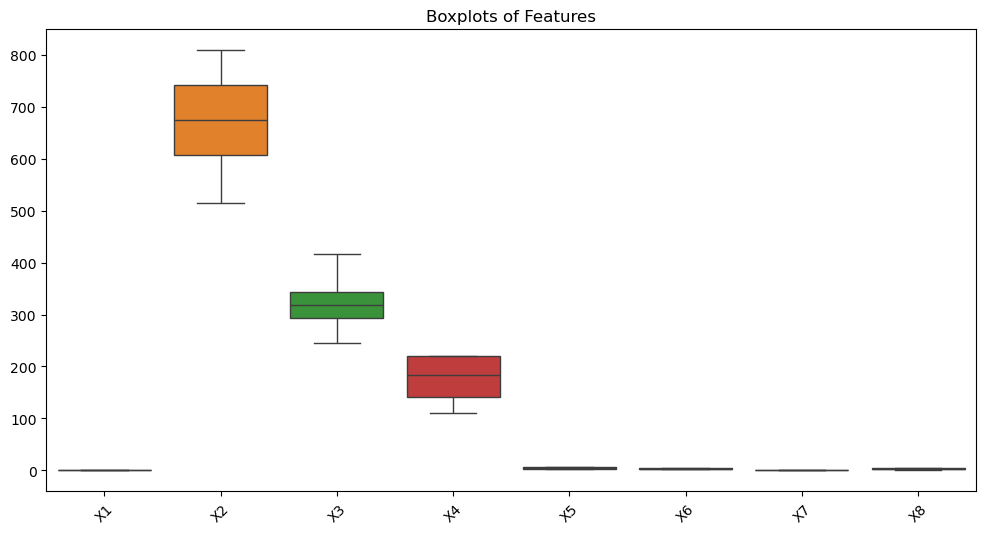

In [9]:
df[FEATURES].hist(bins=20, figsize=(12,8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df[FEATURES])
plt.title("Boxplots of Features")
plt.xticks(rotation=45)
plt.show()

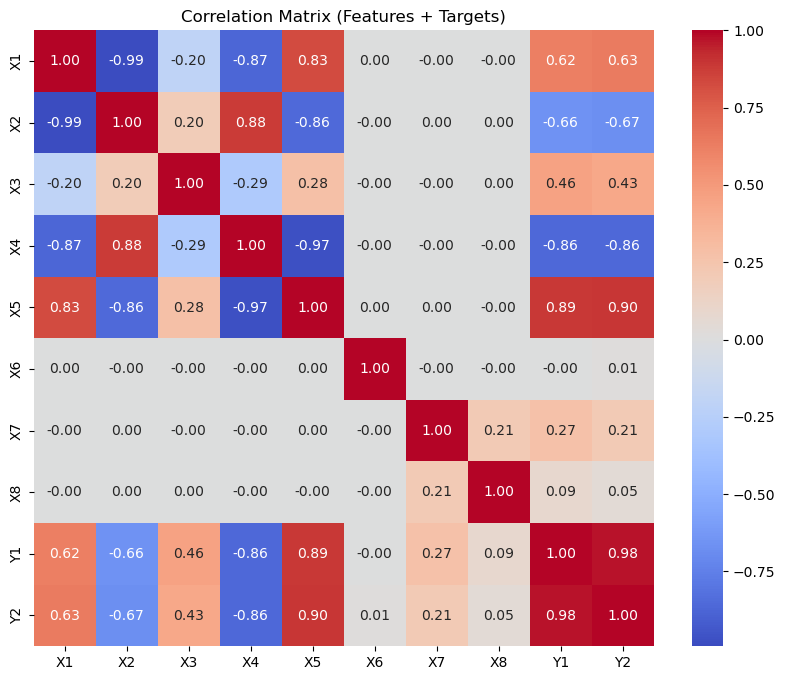

In [10]:
corr = df[FEATURES + TARGETS].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix (Features + Targets)")
plt.show()


**EDA Summary**

- The dataset shows strong multicollinearity among several features (X1/X2, X4/X5).

- The most predictive features are X4 and X5, both strongly correlated with the targets.

- Y1 and Y2 are almost perfectly correlated (0.98), meaning they can be modeled jointly.

- X6 and X8 seem to have no significant relationship with the outputs possibly categorical or low impact.


## Data prepocessing 

Here we are going to make sure that our data is clean, consistent, and ready for modeling.
- Let's drop redundant features to reduces multicollinearity.
    - X1 and X2 is hightly correlated, so we'll drop X2
    - X4 and X5 , the same case, we'll drop X5
    - in X8, it is almost no correlation, so we'll drop it 

In [13]:
df_reduced = df.drop(columns=['X2','X5','X8'])
df_reduced.head()

,X1,X3,X4,X6,X7,Y1,Y2
0,0.98,294.0,110.25,2,0.0,15.55,21.33
1,0.98,294.0,110.25,3,0.0,15.55,21.33
2,0.98,294.0,110.25,4,0.0,15.55,21.33
3,0.98,294.0,110.25,5,0.0,15.55,21.33
4,0.90,318.5,122.50,2,0.0,20.84,28.28


In [17]:
df_reduced.describe()


,X1,X3,X4,X7,Y1,Y2,X6_3,X6_4,X6_5
count,768.0,768.00000,768.00000,768.0,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.0,318.25000,176.25000,0.0,21.828125,24.091146,0.250000,0.250000,0.250000
std,0.0,43.53338,45.05364,0.0,10.071149,9.514390,0.433295,0.433295,0.433295
min,0.0,245.00000,110.00000,0.0,6.000000,10.000000,0.000000,0.000000,0.000000
25%,0.0,294.00000,140.75000,0.0,12.750000,15.000000,0.000000,0.000000,0.000000
50%,0.0,318.00000,183.50000,0.0,18.500000,22.000000,0.000000,0.000000,0.000000
75%,0.0,343.00000,220.00000,0.0,31.000000,33.000000,0.250000,0.250000,0.250000
max,0.0,416.00000,220.00000,0.0,43.000000,48.000000,1.000000,1.000000,1.000000


In [14]:
df_reduced['X6'].nunique() # let's see how many distinct values 

4

We can see that X6(building orientation) is a categorical feature. It has only 4 distinct values. We are going to make an one-hot encoding . 

In [15]:
df_reduced = pd.get_dummies(df_reduced, columns=['X6'], prefix='X6', drop_first=True).astype(int)

In [16]:
df_reduced.head()

,X1,X3,X4,X7,Y1,Y2,X6_3,X6_4,X6_5
0,0,294,110,0,15,21,0,0,0
1,0,294,110,0,15,21,1,0,0
2,0,294,110,0,15,21,0,1,0
3,0,294,110,0,15,21,0,0,1
4,0,318,122,0,20,28,0,0,0


## Modeling

In [53]:
X = df_reduced[['X1', 'X3', 'X4', 'X7', 'X6_3', 'X6_4', 'X6_5']]
y1 = df_reduced['Y1']  # Heating load
y2 = df_reduced['Y2']  # Cooling load

In [54]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

In [55]:
# linear regression model

model_y1 = LinearRegression()
model_y2 = LinearRegression()

model_y1.fit(X_train, y1_train)
model_y2.fit(X_train, y2_train)

LinearRegression()

In [56]:
# Predictions
y1_pred = model_y1.predict(X_test)
y2_pred = model_y2.predict(X_test)

# Metrics
print("Heating Load (Y1):")
print("MSE:", mean_squared_error(y1_test, y1_pred))
print("R²:", r2_score(y1_test, y1_pred))

print("\nCooling Load (Y2):")
print("MSE:", mean_squared_error(y2_test, y2_pred))
print("R²:", r2_score(y2_test, y2_pred))

Heating Load (Y1):
MSE: 21.973172477698295
R²: 0.7881295308330747

Cooling Load (Y2):
MSE: 21.19970682421335
R²: 0.7712300716000929


In [57]:
coeff_df_y1 = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_y1.coef_})
coeff_df_y2 = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_y2.coef_})

print("\nCoefficients for Heating Load (Y1):")
print(coeff_df_y1)

print("\nCoefficients for Cooling Load (Y2):")
print(coeff_df_y2)


Coefficients for Heating Load (Y1):
  Feature  Coefficient
0      X1     0.000000
1      X3     0.048954
2      X4    -0.179804
3      X7     0.000000
4    X6_3     0.318751
5    X6_4     0.192900
6    X6_5    -0.014860

Coefficients for Cooling Load (Y2):
  Feature  Coefficient
0      X1     0.000000
1      X3     0.040360
2      X4    -0.171403
3      X7     0.000000
4    X6_3    -0.267372
5    X6_4    -0.218451
6    X6_5     0.122052


## Decision tree

In [62]:
# decision tree model
tree_y1 = DecisionTreeRegressor(random_state=42)
tree_y2 = DecisionTreeRegressor(random_state=42)

tree_y1.fit(X_train, y1_train)
tree_y2.fit(X_train, y2_train)

DecisionTreeRegressor(random_state=42)

In [63]:
# Predictions
y1_pred = tree_y1.predict(X_test)
y2_pred = tree_y2.predict(X_test)

# Metrics
mse_y1 = mean_squared_error(y1_test, y1_pred)
mse_y2 = mean_squared_error(y2_test, y2_pred)

r2_y1 = r2_score(y1_test, y1_pred)
r2_y2 = r2_score(y2_test, y2_pred)

print("Heating Load (Y1):")
print("MSE =", mse_y1)
print("R² =", r2_y1)

print("\nCooling Load (Y2):")
print("MSE =", mse_y2)
print("R² =", r2_y2)

Heating Load (Y1):
MSE = 11.37836604869241
R² = 0.8902871328418207

Cooling Load (Y2):
MSE = 8.741029898401292
R² = 0.905673941598345


In [64]:
importance_y1 = pd.DataFrame({'Feature': X.columns, 'Importance': tree_y1.feature_importances_})
importance_y2 = pd.DataFrame({'Feature': X.columns, 'Importance': tree_y2.feature_importances_})

print("\nFeature Importance for Heating Load (Y1):")
print(importance_y1.sort_values(by='Importance', ascending=False))

print("\nFeature Importance for Cooling Load (Y2):")
print(importance_y2.sort_values(by='Importance', ascending=False))


Feature Importance for Heating Load (Y1):
  Feature  Importance
2      X4    0.882722
1      X3    0.114560
6    X6_5    0.001073
5    X6_4    0.000980
4    X6_3    0.000665
0      X1    0.000000
3      X7    0.000000

Feature Importance for Cooling Load (Y2):
  Feature  Importance
2      X4    0.879893
1      X3    0.115696
6    X6_5    0.002177
4    X6_3    0.001277
5    X6_4    0.000958
0      X1    0.000000
3      X7    0.000000


## Random forest 

In [68]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [73]:
rf_y1 = RandomForestRegressor(random_state=42)
grid_y1 = GridSearchCV(estimator=rf_y1, param_grid=param_grid,
                       cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_y1.fit(X_train, y1_train)

print("Best Parameters for Heating Load (Y1):")
print(grid_y1.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Heating Load (Y1):
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [74]:
rf_y2 = RandomForestRegressor(random_state=42)
grid_y2 = GridSearchCV(estimator=rf_y2, param_grid=param_grid,
                       cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_y2.fit(X_train, y2_train)

print("Best Parameters for Cooling Load (Y2):")
print(grid_y2.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Cooling Load (Y2):
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [75]:
# Predict with best models
y1_pred = grid_y1.best_estimator_.predict(X_test)
y2_pred = grid_y2.best_estimator_.predict(X_test)

# Metrics
print("\nHeating Load (Y1):")
print("MSE =", mean_squared_error(y1_test, y1_pred))
print("R² =", r2_score(y1_test, y1_pred))

print("\nCooling Load (Y2):")
print("MSE =", mean_squared_error(y2_test, y2_pred))
print("R² =", r2_score(y2_test, y2_pred))


Heating Load (Y1):
MSE = 11.293551097709443
R² = 0.8911049384397774

Cooling Load (Y2):
MSE = 8.72317150953825
R² = 0.9058666547511925


## Evaluation

We have got complete results for all three models: linear regression, Decision tree and Random forest. Let analyse and visualize them. 
Let's create a dataframe for the results.

In [78]:
# Create the results DataFrame
data = {
    "Model": ["Linear Regression", "Linear Regression", "Decision Tree", "Decision Tree", "Random Forest", "Random Forest"],
    "Target": ["Heating Load (Y1)", "Cooling Load (Y2)", "Heating Load (Y1)", "Cooling Load (Y2)", "Heating Load (Y1)", "Cooling Load (Y2)"],
    "MSE": [21.97, 21.20, 11.38, 8.74, 11.29, 8.72],
    "R2": [0.7881, 0.7712, 0.8903, 0.9057, 0.8911, 0.9059]
}

df_results = pd.DataFrame(data)
df_results

,Model,Target,MSE,R2
0,Linear Regression,Heating Load (Y1),21.97,0.7881
1,Linear Regression,Cooling Load (Y2),21.20,0.7712
2,Decision Tree,Heating Load (Y1),11.38,0.8903
3,Decision Tree,Cooling Load (Y2),8.74,0.9057
4,Random Forest,Heating Load (Y1),11.29,0.8911
5,Random Forest,Cooling Load (Y2),8.72,0.9059


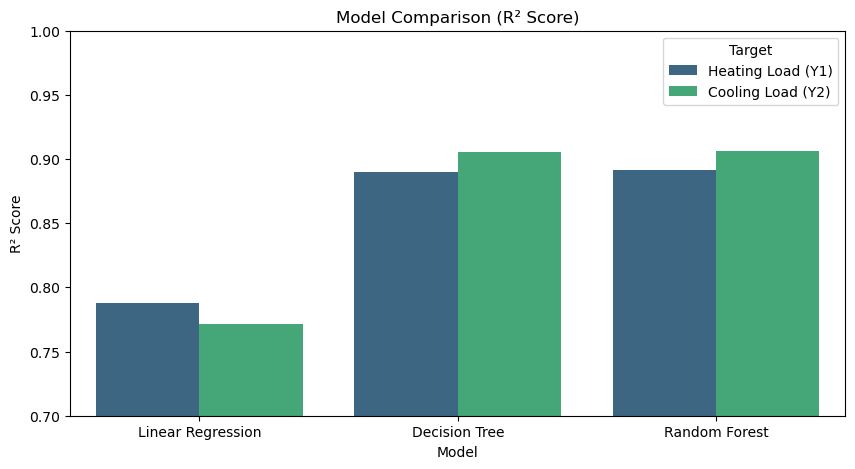

In [79]:
# Plot R² Comparison
plt.figure(figsize=(10,5))
sns.barplot(data=df_results, x="Model", y="R2", hue="Target", palette="viridis")
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.ylim(0.7, 1)
plt.show()

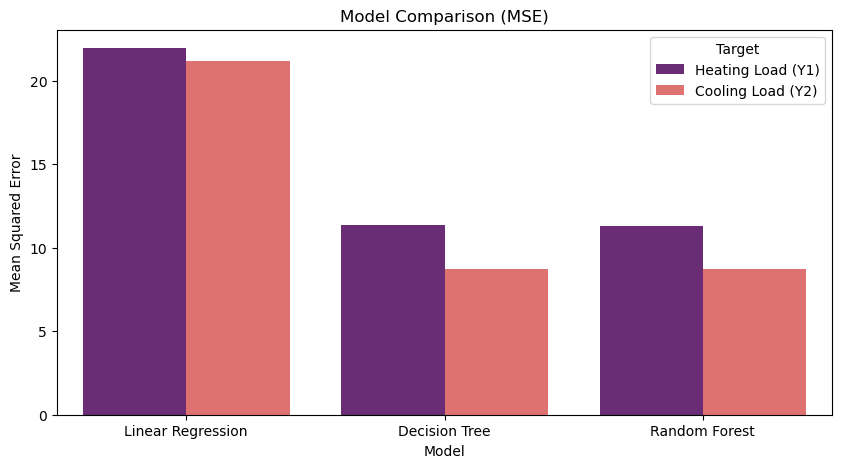

In [80]:
# Plot MSE Comparison
plt.figure(figsize=(10,5))
sns.barplot(data=df_results, x="Model", y="MSE", hue="Target", palette="magma")
plt.title("Model Comparison (MSE)")
plt.ylabel("Mean Squared Error")
plt.show()

The linear regression is simple, interpretable, good baseline but limited accuracy. Decision tree is stronger, good for insight but may be overfit. The random forest model is highest accuracy , stable , handles nonlinearity. It is a recommended model.

- X4 is clearly the dominant feature for both heating and cooling predictions,it contributes about 88%-89% of the model’s predictive power.
- X3 is the second most important (around 11-12%) still relevant but far less dominant.
All other features (X6_3, X6_4, X6_5, X1, X7) have negligible influence, meaning the model relies mostly on X4 and X3 to make predictions.

## Conclusion 

After evaluating three models, **Linear Regression, Decision Tree, and Random Forest,** we found that the Random Forest Regressor consistently produced the best results for predicting both heating (Y1) and cooling (Y2) loads. The R² values (≈0.89–0.91) indicate strong predictive accuracy, while the low MSE confirms minimal error. Feature importance analysis revealed that X4 and X3 are the most influential predictors in both targets. Therefore, the Random Forest model is selected as the optimal model due to its robustness, generalization ability, and ability to handle nonlinear patterns that linear regression cannot capture.